# Download and Import Packages

In [3]:
import nltk; nltk.download('stopwords')

!python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 12.0 MB 4.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# Prepare Stopwords

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Import Data

In [1]:
import pandas as pd

# Read cleaned data
df = pd.read_csv('https://raw.githubusercontent.com/nphan20181/nlp_project/main/data/data_cleaned.csv')

# Preview cleaned data
df.head()

,Date,Title,Abstract,Keywords,URL,Text,Year,Volume#,Issue#,Month,Title Length,Abstract Length,Text Length,Number of Keywords,Text_Cleaned,Abstract_Cleaned,Keywords_Cleaned
0,8 January 2021,A Systematic Literature Review on English and ...,Due to the enormous growth of information and ...,"English Bangla Comparison, Latent Dirichlet Al...",https://thescipub.com/pdf/jcssp.2021.1.18.pdf,Because of the rapid development of Informatio...,2021,17,1,January,67,2773,48221,6,rapid development information technology eg. ...,due enormous growth information technology di...,"english bangla comparison, latent dirichlet al..."
1,21 January 2021,DAD: A Detailed Arabic Dataset for Online Text...,This paper presents a novel Arabic dataset tha...,"Arabic Dataset, Arabic Benchmark, Arabic Recog...",https://thescipub.com/pdf/jcssp.2021.19.32.pdf,"In the literature, many papers that focus on A...",2021,17,1,January,96,2553,37984,9,literature many paper focus arabic text recog...,paper present novel arabic dataset consider ch...,"arab dataset, arab benchmark, arab recognition..."
2,20 January 2021,Collision Avoidance Modelling in Airline Traff...,An Air Traffic Controller (ATC) system aims to...,"Air Traffic Control, Collision Avoidance, Conf...",https://thescipub.com/pdf/jcssp.2021.33.43.pdf,Collision avoidance on air traffic becomes ver...,2021,17,1,January,109,3375,30346,4,collision avoidance air traffic become importa...,air traffic controller atc system aim manage...,"air traffic control, collis avoidance, conflic..."
3,20 January 2021,Fine-Tuned MobileNet Classifier for Classifica...,"This paper proposed an accurate, fast and reli...","Strawberry, Cherry Fruit, Accuracy, MobileNet,...",https://thescipub.com/pdf/jcssp.2021.44.54.pdf,"In recent years, farmers in India eventually l...",2021,17,1,January,87,3283,29159,5,recent year farmer india eventually lose yiel...,paper propose accurate fast reliable strawber...,"strawberry, cherri fruit, accuracy, mobilenet,..."
4,21 January 2021,A Content Filtering from Spam Posts on Social ...,The system for filtering spam posts on social ...,"Content Filtering, Spam Detection, Multimodal ...",https://thescipub.com/pdf/jcssp.2021.55.66.pdf,Spam is the use of electronic devices to trans...,2021,17,1,January,86,2745,30537,5,spam use electronic device transmit non relev...,system filtering spam post social medium prefe...,"content filtering, spam detection, multimod da..."


In [2]:
df = df[['Text_Cleaned', 'Title']]
df.head()

,Text_Cleaned,Title
0,rapid development information technology eg. ...,A Systematic Literature Review on English and ...
1,literature many paper focus arabic text recog...,DAD: A Detailed Arabic Dataset for Online Text...
2,collision avoidance air traffic become importa...,Collision Avoidance Modelling in Airline Traff...
3,recent year farmer india eventually lose yiel...,Fine-Tuned MobileNet Classifier for Classifica...
4,spam use electronic device transmit non relev...,A Content Filtering from Spam Posts on Social ...


# Clean data some more

In [6]:
# Convert to list
data = df.Text_Cleaned.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['rapid development information technology eg. internet social medium online '
 'database etc . amount datum generate exponentially exacerbate recent year. '
 'vast accumulation datum provide essential support training machine learning '
 'model easy access search engine query. hand massive flourish information '
 'extract knowledge interest datum become matter general concern xu et al . '
 '2019 . accord study domo a cloud base business service system roughly 25 '
 'quintilian byte datum produce daily 90 datum world create last two year '
 'accord 2018 study al helal mouhoub 2018 . feasible person sieve useful '
 'information vast amount datum manually. moreover national science foundation '
 'scale scientific datum management data intensive challenge area future study '
 'karami et al . 2018 . crucial precisely efficiently estimate numerical '
 'characteristic determine appropriate statistical distribution model text '
 'corpora jiang et al . 2017 . topic model probabilistic approach

# Tokenize and Clean even more

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['rapid', 'development', 'information', 'technology', 'eg', 'internet', 'social', 'medium', 'online', 'database', 'etc', 'amount', 'datum', 'generate', 'exponentially', 'exacerbate', 'recent', 'year', 'vast', 'accumulation', 'datum', 'provide', 'essential', 'support', 'training', 'machine', 'learning', 'model', 'easy', 'access', 'search', 'engine', 'query', 'hand', 'massive', 'flourish', 'information', 'extract', 'knowledge', 'interest', 'datum', 'become', 'matter', 'general', 'concern', 'xu', 'et', 'al', 'accord', 'study', 'domo', 'cloud', 'base', 'business', 'service', 'system', 'roughly', 'quintilian', 'byte', 'datum', 'produce', 'daily', 'datum', 'world', 'create', 'last', 'two', 'year', 'accord', 'study', 'al', 'helal', 'mouhoub', 'feasible', 'person', 'sieve', 'useful', 'information', 'vast', 'amount', 'datum', 'manually', 'moreover', 'national', 'science', 'foundation', 'scale', 'scientific', 'datum', 'management', 'data', 'intensive', 'challenge', 'area', 'future', 'study', 'k

# Creating Bigram and Trigram Models

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['rapid', 'development', 'information', 'technology', 'eg', 'internet', 'social_medium', 'online', 'database', 'etc', 'amount', 'datum', 'generate', 'exponentially', 'exacerbate', 'recent_year', 'vast', 'accumulation', 'datum', 'provide', 'essential', 'support', 'training', 'machine_learning', 'model', 'easy', 'access', 'search_engine', 'query', 'hand', 'massive', 'flourish', 'information', 'extract', 'knowledge', 'interest', 'datum', 'become', 'matter', 'general', 'concern', 'xu', 'et', 'al', 'accord', 'study', 'domo', 'cloud', 'base', 'business', 'service', 'system', 'roughly', 'quintilian', 'byte', 'datum', 'produce', 'daily', 'datum', 'world', 'create', 'last', 'two', 'year', 'accord', 'study', 'al', 'helal_mouhoub', 'feasible', 'person', 'sieve', 'useful', 'information', 'vast_amount', 'datum', 'manually', 'moreover', 'national', 'science', 'foundation', 'scale', 'scientific', 'datum', 'management', 'data', 'intensive', 'challenge', 'area', 'future', 'study', 'karami', 'et', 'al',

# Remove Stopwords, Make Bigrams and Lemmatize

In [9]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['technology', 'online', 'database', 'amount', 'datum', 'generate', 'exponentially', 'exacerbate', 'vast', 'accumulation', 'provide', 'essential', 'support', 'train', 'machine', 'learning', 'model', 'easy', 'access', 'query', 'hand', 'massive', 'flourish', 'information', 'extract', 'knowledge', 'interest', 'datum', 'become', 'general', 'concern', 'service', 'system', 'roughly', 'quintilian', 'byte', 'datum', 'produce', 'daily', 'world', 'create', 'last', 'year', 'accord', 'study', 'feasible', 'person', 'sieve', 'useful', 'information', 'manually', 'moreover', 'scale', 'scientific', 'management', 'datum', 'intensive', 'challenge', 'area', 'precisely', 'efficiently', 'estimate', 'numerical', 'characteristic', 'determine', 'appropriate', 'statistical', 'distribution', 'model', 'text', 'observe', 'instrument', 'measurement', 'hide', 'hide', 'structure', 'pre', 'process', 'document', 'first', 'extraneous', 'word', 'stop', 'word', 'remove', 'text', 'punctuation', 'also', 'usually', 'remove'

# Create Dictionary and Corpus

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 3), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 2), (9, 3), (10, 1), (11, 1), (12, 2), (13, 1), (14, 4), (15, 1), (16, 4), (17, 1), (18, 1), (19, 2), (20, 21), (21, 1), (22, 2), (23, 1), (24, 6), (25, 4), (26, 1), (27, 1), (28, 4), (29, 1), (30, 2), (31, 1), (32, 12), (33, 4), (34, 3), (35, 1), (36, 2), (37, 9), (38, 1), (39, 8), (40, 1), (41, 1), (42, 1), (43, 1), (44, 4), (45, 1), (46, 1), (47, 1), (48, 6), (49, 1), (50, 3), (51, 2), (52, 1), (53, 1), (54, 2), (55, 2), (56, 1), (57, 3), (58, 6), (59, 4), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 4), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 4), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 1), (82, 1), (83, 6), (84, 2), (85, 1), (86, 2), (87, 2), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 7), (94, 1), (95, 1), (96, 3), (97, 3), (98, 2), (99, 9), (100, 7), (101, 1), (102, 1), (103, 2), (104, 1), (105, 6), (106, 1), (107, 1), (108, 8), (109, 5), (110, 

In [12]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('absolute', 2),
  ('access', 1),
  ('accord', 3),
  ('accordingly', 1),
  ('accumulation', 1),
  ('accuracy', 4),
  ('accurately', 1),
  ('acquaint', 1),
  ('acquire', 2),
  ('add', 3),
  ('address', 1),
  ('adjacent', 1),
  ('advantage', 2),
  ('advertisement', 1),
  ('akter', 4),
  ('algebra', 1),
  ('algorithm', 4),
  ('alkhodair', 1),
  ('allocation', 1),
  ('already', 2),
  ('also', 21),
  ('alternate', 1),
  ('always', 2),
  ('amount', 1),
  ('analysis', 6),
  ('analyze', 4),
  ('announcement', 1),
  ('annually', 1),
  ('answer', 4),
  ('api', 1),
  ('apparent', 2),
  ('appear', 1),
  ('application', 12),
  ('apply', 4),
  ('approach', 3),
  ('appropriate', 1),
  ('archive', 2),
  ('area', 9),
  ('art', 1),
  ('article', 8),
  ('ask', 1),
  ('aspect', 1),
  ('assess', 1),
  ('asset', 1),
  ('associate', 4),
  ('attention', 1),
  ('attribute', 1),
  ('auc', 1),
  ('author', 6),
  ('authorization', 1),
  ('available', 3),
  ('average', 2),
  ('avoid', 1),
  ('background', 1),
  

# Build Topic Model

In [13]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=35, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# View topics in the LDA Model

In [14]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(17,
  '0.190*"link" + 0.035*"portlet" + 0.025*"end" + 0.015*"supercombinator" + '
  '0.012*"tipc" + 0.011*"bind" + 0.011*"content" + 0.010*"recipe" + '
  '0.010*"evaluate" + 0.008*"share"'),
 (32,
  '0.086*"protein" + 0.055*"structure" + 0.035*"mis" + 0.031*"sequence" + '
  '0.027*"fold" + 0.024*"charge" + 0.021*"displacement" + 0.018*"mutant" + '
  '0.015*"energy" + 0.014*"secondary"'),
 (25,
  '0.133*"element" + 0.039*"model" + 0.034*"transformation" + 0.033*"type" + '
  '0.017*"define" + 0.016*"force" + 0.014*"dimension" + 0.013*"material" + '
  '0.011*"plate" + 0.011*"load"'),
 (9,
  '0.058*"alignment" + 0.054*"production" + 0.028*"water" + 0.022*"furnace" + '
  '0.018*"land" + 0.016*"child" + 0.016*"parallel" + 0.015*"table" + '
  '0.015*"disabled" + 0.014*"soil"'),
 (7,
  '0.058*"word" + 0.043*"language" + 0.029*"unit" + 0.028*"sentence" + '
  '0.019*"context" + 0.016*"predicate" + 0.016*"system" + 0.015*"tag" + '
  '0.015*"rule" + 0.015*"example"'),
 (0,
  '0.113*"query" + 0.0

# Compute Model Perplexity and Coherence Scores

In [15]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -7.239704669832704

Coherence Score:  0.45695754703519764


# Visualize the topics-keywords

In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22     0.099878  0.143472       1        1  7.576606
15     0.100269  0.149601       2        1  6.400630
21     0.140878 -0.111017       3        1  6.108010
34     0.109708 -0.036687       4        1  5.186241
28     0.123043  0.041097       5        1  5.124653
5      0.098479 -0.065825       6        1  4.674018
14     0.124236 -0.038755       7        1  4.468987
31     0.082918 -0.119838       8        1  4.372297
13     0.084227 -0.086222       9        1  4.366685
20     0.091725 -0.067852      10        1  4.347913
24     0.091804 -0.039410      11        1  4.119946
11     0.091287  0.000433      12        1  3.896139
12     0.089835  0.228318      13        1  3.817104
33     0.091221 -0.121352      14        1  3.722474
19     0.056880 -0.133896      15        1  3.488770
30     0.097184 -0.033373      16        1  3.004199
4      0.056146  0.088945      17        1  2.766117
1      0.051691 -0.067151      18        1  2.644293
26     0.044728  0.095508      19        1  2.376859
6      0.038177  0.198829      20        1  2.189194
23     0.054083 -0.141347      21        1  2.148452
27     0.076824  0.082396      22        1  2.111775
8      0.039208 -0.131015      23        1  1.874317
16     0.034786  0.207020      24        1  1.769299
29     0.019231 -0.133564      25        1  1.405638
10    -0.024430  0.159889      26        1  1.326477
7     -0.089079  0.068143      27        1  0.920206
18    -0.165358 -0.029083      28        1  0.756437
3     -0.068368  0.016369      29        1  0.756198
0     -0.140136 -0.098200      30        1  0.665791
2     -0.259172  0.029294      31        1  0.585672
25    -0.225802 -0.041867      32        1  0.403601
9     -0.327566 -0.020105      33        1  0.257315
32    -0.344273 -0.000161      34        1  0.212258
17    -0.344262  0.007408      35        1  0.155431, topic_info=         Term          Freq         Total Category  logprob  loglift
277     image  17821.000000  17821.000000  Default  30.0000  30.0000
628      user  10667.000000  10667.000000  Default  29.0000  29.0000
361     model  15738.000000  15738.000000  Default  28.0000  28.0000
575    system  26413.000000  26413.000000  Default  27.0000  27.0000
378   network  15407.000000  15407.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
527     share     32.624366   1944.240456  Topic35  -4.8048   2.3792
2108     push     18.759098    102.760496  Topic35  -5.3582   4.7660
74       call     26.002915   4561.738361  Topic35  -5.0317   1.2995
252      give     24.535400   9652.547790  Topic35  -5.0898   0.4919
632     value     17.080968  15546.205101  Topic35  -5.4519  -0.3469

[2402 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
2316       1  0.106489   abstraction
2316       2  0.021298   abstraction
2316      17  0.539542   abstraction
2316      19  0.266221   abstraction
2316      27  0.063893   abstraction
...      ...       ...           ...
16693      6  0.978511          xxxx
40694     25  0.969645  xxxxxxxxxxxx
10131     20  0.974662           zip
35095     35  0.975529        ztally
15013     15  0.954936          ﬁthe

[8401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 16, 22, 35, 29, 6, 15, 32, 14, 21, 25, 12, 13, 34, 20, 31, 5, 2, 27, 7, 24, 28, 9, 17, 30, 11, 8, 19, 4, 1, 3, 26, 10, 33, 18])

# Bulding LDA Mallet Model

In [ ]:
!unzip /content/mallet-2.0.8.zip

In [19]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=35, id2word=id2word)

In [20]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(29,
  [('datum', 0.08293767654306149),
   ('file', 0.047278482280585774),
   ('program', 0.020273654266081697),
   ('information', 0.017829597131237856),
   ('video', 0.017749464110423302),
   ('code', 0.01746899853757237),
   ('size', 0.016647635074223212),
   ('table', 0.013442314241641124),
   ('content', 0.01338221447603021),
   ('bit', 0.01318188192399383)]),
 (32,
  [('system', 0.10794171967986867),
   ('model', 0.05815960695790732),
   ('process', 0.03198899095858331),
   ('event', 0.026689682645067055),
   ('state', 0.01840875894786398),
   ('base', 0.014364867638005336),
   ('object', 0.014014799435062349),
   ('rule', 0.01343537620260499),
   ('approach', 0.011455680158375683),
   ('change', 0.011371180936975651)]),
 (14,
  [('agent', 0.0572473212925504),
   ('message', 0.042774683887130356),
   ('server', 0.03417573675034277),
   ('mobile', 0.03253381180493255),
   ('request', 0.02251299151954229),
   ('send', 0.019246068690014728),
   ('process', 0.016859353047717386),
  

# Finding optimal number of topics for LDA

In [21]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [22]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

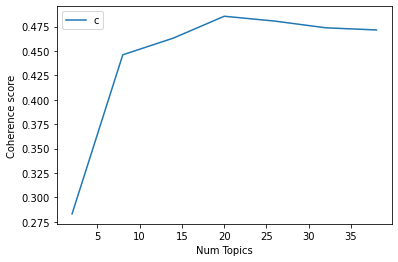

In [23]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2831
Num Topics = 8  has Coherence Value of 0.4461
Num Topics = 14  has Coherence Value of 0.4632
Num Topics = 20  has Coherence Value of 0.4856
Num Topics = 26  has Coherence Value of 0.4806
Num Topics = 32  has Coherence Value of 0.4737
Num Topics = 38  has Coherence Value of 0.4715


In [25]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.052*"service" + 0.035*"agent" + 0.029*"server" + 0.024*"message" + '
  '0.022*"mobile" + 0.021*"request" + 0.015*"client" + 0.015*"process" + '
  '0.013*"web" + 0.012*"peer"'),
 (1,
  '0.038*"packet" + 0.031*"network" + 0.028*"traffic" + 0.023*"rate" + '
  '0.021*"time" + 0.012*"flow" + 0.012*"delay" + 0.010*"throughput" + '
  '0.009*"queue" + 0.009*"transmission"'),
 (2,
  '0.049*"test" + 0.046*"software" + 0.018*"component" + 0.018*"metric" + '
  '0.015*"project" + 0.014*"tool" + 0.014*"study" + 0.012*"program" + '
  '0.011*"case" + 0.011*"code"'),
 (3,
  '0.051*"datum" + 0.047*"cluster" + 0.032*"tree" + 0.029*"set" + '
  '0.019*"database" + 0.017*"number" + 0.015*"table" + 0.014*"time" + '
  '0.013*"attribute" + 0.012*"query"'),
 (4,
  '0.054*"user" + 0.027*"web" + 0.022*"student" + 0.019*"learn" + 0.016*"page" '
  '+ 0.014*"base" + 0.013*"ontology" + 0.012*"content" + 0.011*"system" + '
  '0.011*"search"'),
 (5,
  '0.062*"node" + 0.042*"network" + 0.032*"route" + 0.022*"p

# Finding the dominant topic in each sentence

In [26]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,18.0,0.5505,"word, text, document, term, character, result,...",rapid development information technology eg. i...
1,1,18.0,0.6213,"word, text, document, term, character, result,...",literature many paper focus arabic text recogn...
2,2,17.0,0.4558,"point, position, fig, show, sensor, move, dire...",collision avoidance air traffic become importa...
3,3,14.0,0.5548,"feature, classification, accuracy, training, n...",recent year farmer india eventually lose yield...
4,4,14.0,0.4850,"feature, classification, accuracy, training, n...",spam use electronic device transmit non releva...
5,5,16.0,0.4484,"model, datum, prediction, variable, fuzzy, pre...",recent time order offer advantage conventional...
6,6,2.0,0.8117,"test, software, component, metric, project, to...",software testing activity play important role ...
7,7,18.0,0.4259,"word, text, document, term, character, result,...",social medium platform occupy large part daily...
8,8,15.0,0.5467,"model, state, event, process, rule, class, def...",understand computer system organization archit...
9,9,2.0,0.6409,"test, software, component, metric, project, to...",analogous test drive development tdd beck 2003...


# Find the most representative document for each topic

In [27]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7719,"service, agent, server, message, mobile, reque...",web service ws internet aware application invo...
1,1.0,0.8460,"packet, network, traffic, rate, time, flow, de...",ieee 80211 base wireless network become favori...
2,2.0,0.8117,"test, software, component, metric, project, to...",software testing activity play important role ...
3,3.0,0.8792,"datum, cluster, tree, set, database, number, t...",21st century transactional database dynamic. n...
4,4.0,0.7168,"user, web, student, learn, page, base, ontolog...",web search engine excellent job query understa...


# Topic distribution across documents

In [28]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,18.0,"word, text, document, term, character, result,...",67.0,0.0370
1.0,18.0,"word, text, document, term, character, result,...",102.0,0.0563
2.0,17.0,"point, position, fig, show, sensor, move, dire...",64.0,0.0353
3.0,14.0,"feature, classification, accuracy, training, n...",86.0,0.0475
4.0,14.0,"feature, classification, accuracy, training, n...",87.0,0.0480
...,...,...,...,...
1806.0,15.0,"model, state, event, process, rule, class, def...",NaN,NaN
1807.0,1.0,"packet, network, traffic, rate, time, flow, de...",NaN,NaN
1808.0,10.0,"bit, number, sequence, block, size, input, tab...",NaN,NaN
1809.0,15.0,"model, state, event, process, rule, class, def...",NaN,NaN
